<a href="https://colab.research.google.com/github/BalramAgnihotri123/Machine-Learning-And-Deep-Learning-HandsOn/blob/main/03_PyTorch_Clothes_Image_Classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Importing relevant liabraries

In [1]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchmetrics
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

## 2.Getting/downloading image data 

In [3]:
train_data = torchvision.datasets.FashionMNIST(root ="data",
                                               train=True,
                                               transform =ToTensor(),
                                               download =True,
                                               target_transform=None)
test_data = torchvision.datasets.FashionMNIST(root="data",
                                                    train=False,
                                                    download=True,
                                                    transform=ToTensor(),
                                                    target_transform=None)

In [4]:
img,label= train_data[0]
img.shape

torch.Size([1, 28, 28])

In [5]:
len(train_data)

60000

### 2.1 Visualizing data with random samples of the data

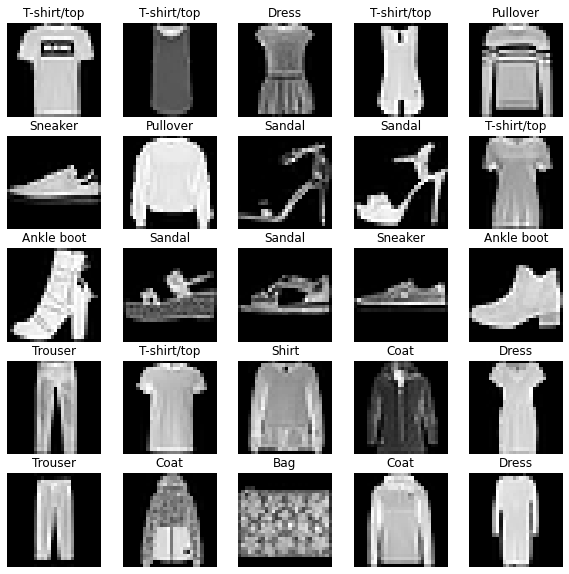

In [6]:
##Getting titles of the labels of the images
class_names = train_data.class_to_idx

##Setting up a random seed
torch.manual_seed(42)

## Plotting random images
rows,columns=5,5
plt.figure(figsize=(10,10))
for i in range(1,rows*columns+1):
  idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[i]
  plt.subplot(rows,columns,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(tuple(class_names.items())[label][0])
  plt.axis(False)

## 3.Base Model

### 3.1 Creating a DataLoader

In [7]:
BATCH_SIZE=32
train_dataloader = torch.utils.data.DataLoader(train_data,
                                               batch_size =BATCH_SIZE,
                                               shuffle=True)
test_dataloader =torch.utils.data.DataLoader(test_data,
                                             shuffle=False,
                                             batch_size =BATCH_SIZE)

In [8]:
train_feature,train_label= next(iter(train_dataloader))
train_feature.shape,train_label.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Trouser')

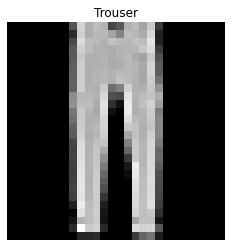

In [9]:
## random seed 
torch.manual_seed(42)

## plotting a random image from the data loader
idx = torch.randint(0,len(train_feature),size =[1]).item()
img,label=train_feature[idx],train_label[idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.axis(False)
plt.title(tuple(class_names.items())[label][0])

### 3.2 Making a Model subclass that subclasses `nn.Module`

In [10]:
## Creating a class
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input:int,
               hidden:int,
               output:int):
    super().__init__()
    self.Layers = nn.Sequential(nn.Flatten(),
                                nn.Linear(input,hidden),
                                nn.Linear(hidden,output))
  def forward(self,x:torch.Tensor):
    return self.Layers(x)

## Creating an instance of the class
model_0 =  FashionMNISTModelV0(784,10,10)


### 3.3 Initializing a loss function and an optimizer

In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer =torch.optim.SGD(model_0.parameters(),
                           lr =0.01)

### 3.3 Training and testing loop

In [12]:
from timeit import default_timer as timer
def time_taken(start_time:int,end_time:int,device:torch.device=None):
  time_taken_to_code = end_time-start_time
  return time_taken_to_code

In [13]:
from tqdm.auto import tqdm
from torchmetrics.functional import accuracy

epochs = 6
start_time = timer()
for epoch in tqdm(range(epochs)):
  train_loss=0
  train_acc =0
  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred=model_0(X)
    y_values=y_pred.argmax(dim=1)
    train_acc+=accuracy(y_values,y)
    loss =loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch%400==0:
      print(f'epoch:{epoch},\nlooked at {batch*len(X)}/{len(train_data)} samples...')

  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)

  test_loss=0
  test_acc=0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      predictions = model_0(X_test)
      test_loss+=loss_fn(predictions,y_test)
      test_acc += accuracy(preds=predictions.argmax(dim=1),target=y_test)
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
    print(f"\ntraining_loss: {train_loss} test_loss: {test_loss}, test_accuracy: {test_acc} \n")

end_time =timer()
print(f"time taken for the code to run is : {time_taken(start_time,end_time)} seconds")

  0%|          | 0/6 [00:00<?, ?it/s]

epoch:0,
looked at 0/60000 samples...
epoch:0,
looked at 12800/60000 samples...
epoch:0,
looked at 25600/60000 samples...
epoch:0,
looked at 38400/60000 samples...
epoch:0,
looked at 51200/60000 samples...

training_loss: 0.9140531420707703 test_loss: 0.6346914768218994, test_accuracy: 0.7825479507446289 

epoch:1,
looked at 0/60000 samples...
epoch:1,
looked at 12800/60000 samples...
epoch:1,
looked at 25600/60000 samples...
epoch:1,
looked at 38400/60000 samples...
epoch:1,
looked at 51200/60000 samples...

training_loss: 0.5646927952766418 test_loss: 0.5534481406211853, test_accuracy: 0.809904158115387 

epoch:2,
looked at 0/60000 samples...
epoch:2,
looked at 12800/60000 samples...
epoch:2,
looked at 25600/60000 samples...
epoch:2,
looked at 38400/60000 samples...
epoch:2,
looked at 51200/60000 samples...

training_loss: 0.5077475309371948 test_loss: 0.5178843140602112, test_accuracy: 0.8192891478538513 

epoch:3,
looked at 0/60000 samples...
epoch:3,
looked at 12800/60000 samples.

## 4.Making Predictions with our model

In [14]:
img,label = test_data[0]
model_0.eval()
with torch.inference_mode():
  prediction = model_0(img)
  print(prediction.argmax(dim=1))
  print(f"{label}")

tensor([9])
9


In [15]:
## general function for evaluation of models
def evaluation_metrics_on_cpu(model:torch.nn.Module,
                       dataloader:torch.utils.data.DataLoader,
                       loss_fn:torch.nn.Module):
  '''Returns a dictionary of accuracy, loss and and information of the model'''
  model_0.eval()
  with torch.inference_mode():
     test_loss,test_acc = 0,0
     for X,y in dataloader:
       
       y_pred = model(X)
       
       loss = loss_fn(y_pred,y)
       test_loss+=loss

       accuracy = torchmetrics.functional.accuracy(y_pred.argmax(dim=1),y)
       test_acc+=accuracy
     test_loss/=len(dataloader)
     test_acc/=len(dataloader)
     return {"model class name": model.__class__.__name__ ,"test loss": test_loss.item() ,"test accuracy": test_acc.item()}

In [16]:
model_0_eval = evaluation_metrics_on_cpu(model_0,test_dataloader,loss_fn=loss_fn)

## 5.Creating a new model with non linearity

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchmetrics
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [18]:
### setting up a device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [19]:
## general function for evaluation of models
def evaluation_metrics_on_gpu(model:torch.nn.Module,
                       dataloader:torch.utils.data.DataLoader,
                       loss_fn:torch.nn.Module):
  '''Returns a dictionary of accuracy, loss and and information of the model'''
  model_0.eval()
  with torch.inference_mode():
     test_loss,test_acc = 0,0
     for X,y in dataloader:
       X,y=X.to(device),y.to(device)
       y_pred = model(X)
       
       loss = loss_fn(y_pred,y)
       test_loss+=loss

       accuracy = torchmetrics.functional.accuracy(y_pred.argmax(dim=1),y)
       test_acc+=accuracy
     test_loss/=len(dataloader)
     test_acc/=len(dataloader)
     return {"model class name": model.__class__.__name__ ,"test loss": test_loss.item() ,"test accuracy": test_acc.item()}

In [20]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
              input:int,
              hidden:int,
              output:int):
    super().__init__()
    self.layers =nn.Sequential(nn.Flatten(),
                               nn.Linear(input,hidden),
                               nn.Linear(hidden,output)
                               )
  def forward(self,x:torch.Tensor):
    return self.layers(x)
model_1=FashionMNISTModelV1(784,10,10)
model_1.to(device)

FashionMNISTModelV1(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)

### 5.1 Functioninzing out training and testing loop

In [22]:
def train_loop(model:torch.nn.Module,
                    dataloader:torch.utils.data.DataLoader,
                    device:torch.device,
                    loss_fn:torch.nn.Module,
                    train_data,
                    optimizer:torch.optim.Optimizer,
                   ):
  if device =='cpu':
    torch.manual_seed(42)
  else:
    torch.cuda.manual_seed(42)
  train_loss = 0
  model.train()
  for batch,(X,y) in enumerate(dataloader):
      X,y=X.to(device),y.to(device)
      y_pred=model(X)
      loss = loss_fn(y_pred,y)
      train_loss+=loss
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if batch%500==0:
        print(f"epoch: {epoch};\nwent through {batch*len(X)}/{len(train_data)}")
  train_loss/=len(dataloader)
  print(f"train loss is: {train_loss.item()}")

In [23]:
## general function for evaluation of models
def test_step(model:torch.nn.Module,
                       dataloader:torch.utils.data.DataLoader,
                       loss_fn:torch.nn.Module,
                       device:torch.device=device):
  '''Returns a dictionary of accuracy, loss and and information of the model'''
  model_0.eval()
  with torch.inference_mode():
     test_loss,test_acc = 0,0
     for X,y in dataloader:
       X,y=X.to(device),y.to(device)
       y_pred = model(X)
       
       loss = loss_fn(y_pred,y)
       test_loss+=loss

       accuracy = torchmetrics.functional.accuracy(y_pred.argmax(dim=1),y)
       test_acc+=accuracy
     test_loss/=len(dataloader)
     test_acc/=len(dataloader)
     print(f"test loss: {test_loss} \ntest accuracy: {test_acc}")

In [24]:
epochs = 6
start_time_on_gpu =timer()
for epoch in tqdm(range(epochs)):
  train_loop(model=model_1,
           dataloader=train_dataloader,
           device=device,
           loss_fn=loss_fn,
           train_data=train_data,
           optimizer =optimizer
           )
  test_step(model_1,test_dataloader,loss_fn,device)
end_time_on_gpu=timer()
print(f"time taken on gpu to run the model is {time_taken(start_time_on_gpu,end_time_on_gpu)}")

  0%|          | 0/6 [00:00<?, ?it/s]

epoch: 0;
went through 0/60000
epoch: 0;
went through 16000/60000
epoch: 0;
went through 32000/60000
epoch: 0;
went through 48000/60000
train loss is: 0.5924811363220215
test loss: 0.5022190809249878 
test accuracy: 0.8243809938430786
epoch: 1;
went through 0/60000
epoch: 1;
went through 16000/60000
epoch: 1;
went through 32000/60000
epoch: 1;
went through 48000/60000
train loss is: 0.478282630443573
test loss: 0.48001426458358765 
test accuracy: 0.8303713798522949
epoch: 2;
went through 0/60000
epoch: 2;
went through 16000/60000
epoch: 2;
went through 32000/60000
epoch: 2;
went through 48000/60000
train loss is: 0.4563608765602112
test loss: 0.4706697165966034 
test accuracy: 0.8341653347015381
epoch: 3;
went through 0/60000
epoch: 3;
went through 16000/60000
epoch: 3;
went through 32000/60000
epoch: 3;
went through 48000/60000
train loss is: 0.4446052312850952
test loss: 0.46542778611183167 
test accuracy: 0.8358626365661621
epoch: 4;
went through 0/60000
epoch: 4;
went through 16000

In [25]:
model_1_eval = evaluation_metrics_on_gpu(model_1,test_dataloader,loss_fn)

## 6.Creating a CNN(Convolutional Neural Network) model

### 6.1 Initializing a CNN model subclass

In [26]:
from torch.nn.modules.pooling import MaxPool2d
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input:int,
               hidden:int,
               output:int):
    super().__init__()
    self.conv_layers1 = nn.Sequential(
        nn.Conv2d(in_channels=input,
                  out_channels=hidden,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden,
                  out_channels=hidden,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.conv_layers2 =nn.Sequential(
          nn.Conv2d(in_channels=hidden,
                    out_channels=hidden,
                    kernel_size=3,
                    padding=1,
                    stride=1),
          nn.ReLU(),
          
          nn.Conv2d(in_channels=hidden,
                    out_channels=hidden,
                    kernel_size=3,padding=1,
                    stride=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
          )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=490,
                  out_features=len(class_names))
    )
  def forward(self,x):
    x = self.conv_layers1(x)
    x = self.conv_layers2(x)
    x = self.classifier(x)
    return x


In [27]:
model_2 = FashionMNISTModelV2(1,10,10).to(device)

### 6.2 Setting up a loss and an optimizer function

In [28]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),lr = 0.05)

### 6.3 Training and testing our model through functions 

In [29]:
epochs = 6
start_time_on_gpu =timer()
for epoch in tqdm(range(epochs)):
  train_loop(model=model_2,
           dataloader=train_dataloader,
           device=device,
           loss_fn=loss_fn,
           train_data=train_data,
           optimizer =optimizer
           )
  test_step(model_2,test_dataloader,loss_fn,device)
end_time_on_gpu=timer()
print(f"time taken on gpu to run the model is {time_taken(start_time_on_gpu,end_time_on_gpu)}")

  0%|          | 0/6 [00:00<?, ?it/s]

epoch: 0;
went through 0/60000
epoch: 0;
went through 16000/60000
epoch: 0;
went through 32000/60000
epoch: 0;
went through 48000/60000
train loss is: 0.6985626220703125
test loss: 0.43655577301979065 
test accuracy: 0.842851459980011
epoch: 1;
went through 0/60000
epoch: 1;
went through 16000/60000
epoch: 1;
went through 32000/60000
epoch: 1;
went through 48000/60000
train loss is: 0.3921646475791931
test loss: 0.3708166182041168 
test accuracy: 0.8644169569015503
epoch: 2;
went through 0/60000
epoch: 2;
went through 16000/60000
epoch: 2;
went through 32000/60000
epoch: 2;
went through 48000/60000
train loss is: 0.34355905652046204
test loss: 0.3438566327095032 
test accuracy: 0.8730031847953796
epoch: 3;
went through 0/60000
epoch: 3;
went through 16000/60000
epoch: 3;
went through 32000/60000
train loss is: 0.31851813197135925
test loss: 0.32996171712875366 
test accuracy: 0.8807907104492188
epoch: 4;
went through 0/60000
epoch: 4;
went through 16000/60000
epoch: 4;
went through 320

### 6.4 Evaluating our models

In [30]:
model_2_eval  = evaluation_metrics_on_gpu(model_2,
                                   test_dataloader,
                                   loss_fn)

In [31]:
model_evals = pd.DataFrame([model_0_eval,
                            model_1_eval,
                            model_2_eval])
model_evals

,model class name,test loss,test accuracy
0,FashionMNISTModelV0,0.478023,0.829373
1,FashionMNISTModelV1,0.460072,0.838958
2,FashionMNISTModelV2,0.319207,0.881390


## 7.Saving and loading CNN model

In [32]:
from pathlib import Path
model_path = Path('Computer_vision_model')
model_path.mkdir(parents =True,
                 exist_ok=True)
model_name = "PyTorch_model.pth"
model_file = model_path/model_name 
torch.save(obj=model_2.state_dict(),
           f=model_file)

In [33]:
loaded_model = FashionMNISTModelV2(1,10,10)
loaded_model.load_state_dict(torch.load(f=model_file))

<All keys matched successfully>